(1000, 683)


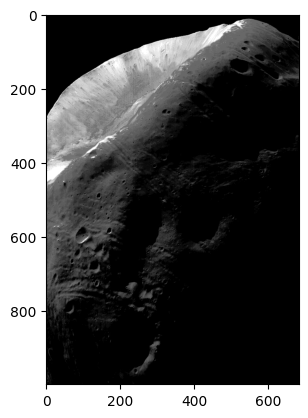

(1000, 683)


<function matplotlib.pyplot.close(fig=None)>

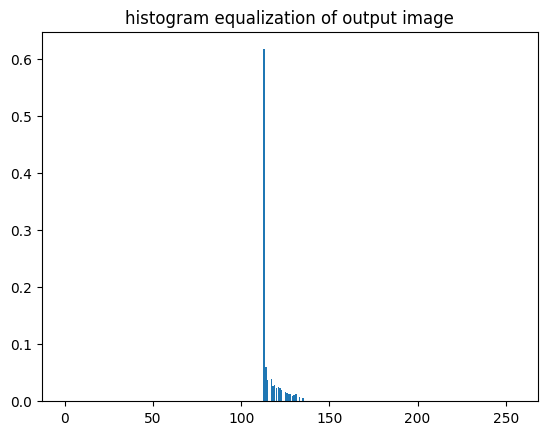

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



def hist_match_12011923(input_image,spec_hist):
    H,W=input_image.shape
    total=H*W*1

    output_image=np.zeros([H,W],dtype=np.uint8)
    input_hist=[]
    output_hist=[]
    
    #input_histogram
    for i in range(256):
        input_hist.append(np.sum(input_image==i)/(total))
    
    # calculate s
    r_s_h=0
    r_s=[]
    for i in range(0,256):
        ind=np.where(input_image==i)
        r_s_h+=len(input_image[ind])
        r_s.append(round(255/total*r_s_h))
    #calculate G(z)    
    z_s_h=0
    z_s=[]
    for i in range(0,256):
        z_s_h+=spec_hist[i]
        z_s.append(round(255*z_s_h))
    
    #map r to z
    r_z=[]
    for i in range(256):
        s=r_s[i]
        flag=True
        for j in range(256):
            if z_s[j]==s:
                r_z.append(j)
                flag=False
                break
        if flag==True:
            minp=255
            jmin=0
            for j in range(256):
                b=abs(z_s[j]-s)
                if b<minp:
                    minp=b
                    jmin=j
            r_z.append(jmin)
    #output image
    for i in range(H):
        for j in range(W):
            output_image[i,j]=r_z[input_image[i][j]]
            
    #output_histtogram
    for i in range(256):
        output_hist.append(np.sum(output_image==i)/(total))

    return(output_image,input_hist,output_hist)

img=cv2.imread('Q3_2.tif',cv2.IMREAD_GRAYSCALE)
cv2.imshow('Q3_2',img)
cv2.waitKey(0)
print(img.shape)

x=np.arange(256)

img2=cv2.imread('Q3_1_1.tif',cv2.IMREAD_GRAYSCALE)
r,c=img2.shape
spec_hist=[]
for i in range(256):
    spec_hist.append(np.sum(img2==i)/(r*c))

(out,input_hist,output_hist)=hist_match_12011923(img,spec_hist)
plt.imshow(out,cmap=plt.cm.gray)
plt.show()
savedimage1=Image.fromarray(out)
savedimage1.save('Q3_2_hist_match_12011923.tif')
savedimage1.save('Q3_2_hist_match_12011923.png')

print(out.shape)


#plt.subplot(2, 1, 1)
#plt.bar(x,input_hist)
#plt.title('histogram equalization of input image')
#plt.subplot(2, 1, 2)
plt.bar(x,output_hist)
plt.title('histogram equalization of output image')
plt.close